In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

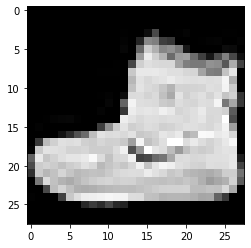

9


In [5]:
plt.imshow(x_train[0], cmap="gray")
plt.show()
print(y_train[0])

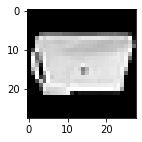

8


In [6]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[110], cmap="gray")
plt.show()
print(y_train[110])

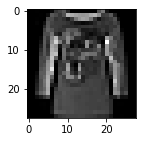

0


In [7]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1110], cmap="gray")
plt.show()
print(y_train[1110])

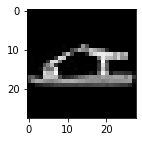

5


In [8]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[120], cmap="gray")
plt.show()
print(y_train[120])

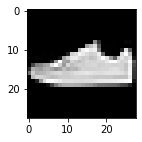

7


In [9]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[23210], cmap="gray")
plt.show()
print(y_train[23210])

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

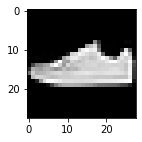

7


In [11]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[23210], cmap="gray")
plt.show()
print(y_train[23210])

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [13]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [14]:
# number of classes

K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_train[0].shape

(28, 28, 1)

In [17]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(i)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [19]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 223s 118ms/step - loss: 0.3952 - accuracy: 0.8567 - val_loss: 0.3216 - val_accuracy: 0.8803
Epoch 2/15
1875/1875 [==============================] - 217s 116ms/step - loss: 0.2672 - accuracy: 0.9010 - val_loss: 0.2926 - val_accuracy: 0.8890
Epoch 3/15
1875/1875 [==============================] - 219s 117ms/step - loss: 0.2141 - accuracy: 0.9199 - val_loss: 0.2761 - val_accuracy: 0.9022
Epoch 4/15
1875/1875 [==============================] - 226s 121ms/step - loss: 0.1753 - accuracy: 0.9342 - val_loss: 0.2752 - val_accuracy: 0.9066
Epoch 5/15
1875/1875 [==============================] - 219s 117ms/step - loss: 0.1416 - accuracy: 0.9470 - val_loss: 0.2865 - val_accuracy: 0.9082
Epoch 6/15
1875/1875 [==============================] - 218s 116ms/step - loss: 0.1166 - accuracy: 0.9569 - val_loss: 0.3445 - val_accuracy: 0.9019
Epoch 7/15
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0983 - accuracy: 0.9629 - val_

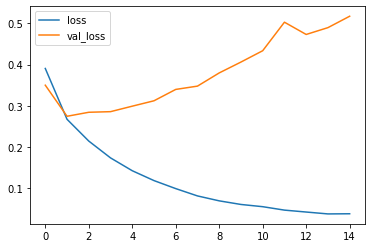

In [20]:
# Plot loss per iteration

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

**Observation:**

It appears that the model is Overfitting a little bit since we see that the validation loss is going slightly up.

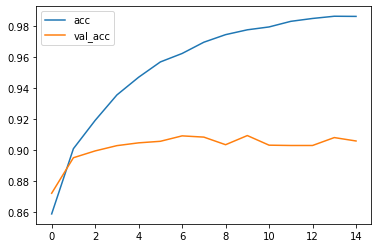

In [21]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

**Observation:**
Here it appears that the validation accuracy stays pretty steady. This is interesting to see when the validation loss simultaneously goes up. It means that our model is becoming more and more confident in making incorrect predictions.

In [22]:
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_test)
cm

array([[835,   3,  18,  20,   4,   2, 117,   0,   1,   0],
       [  1, 985,   2,   8,   2,   0,   2,   0,   0,   0],
       [ 12,   0, 847,  10,  53,   0,  78,   0,   0,   0],
       [ 10,   8,   9, 906,  28,   0,  39,   0,   0,   0],
       [  0,   1,  73,  28, 828,   2,  68,   0,   0,   0],
       [  0,   0,   0,   0,   0, 980,   0,  13,   0,   7],
       [ 80,   0,  52,  20,  55,   1, 789,   0,   3,   0],
       [  0,   0,   0,   0,   0,  11,   0, 971,   1,  17],
       [  4,   0,   9,   8,   1,   3,  14,   3, 957,   1],
       [  0,   0,   0,   0,   0,  11,   1,  28,   0, 960]])

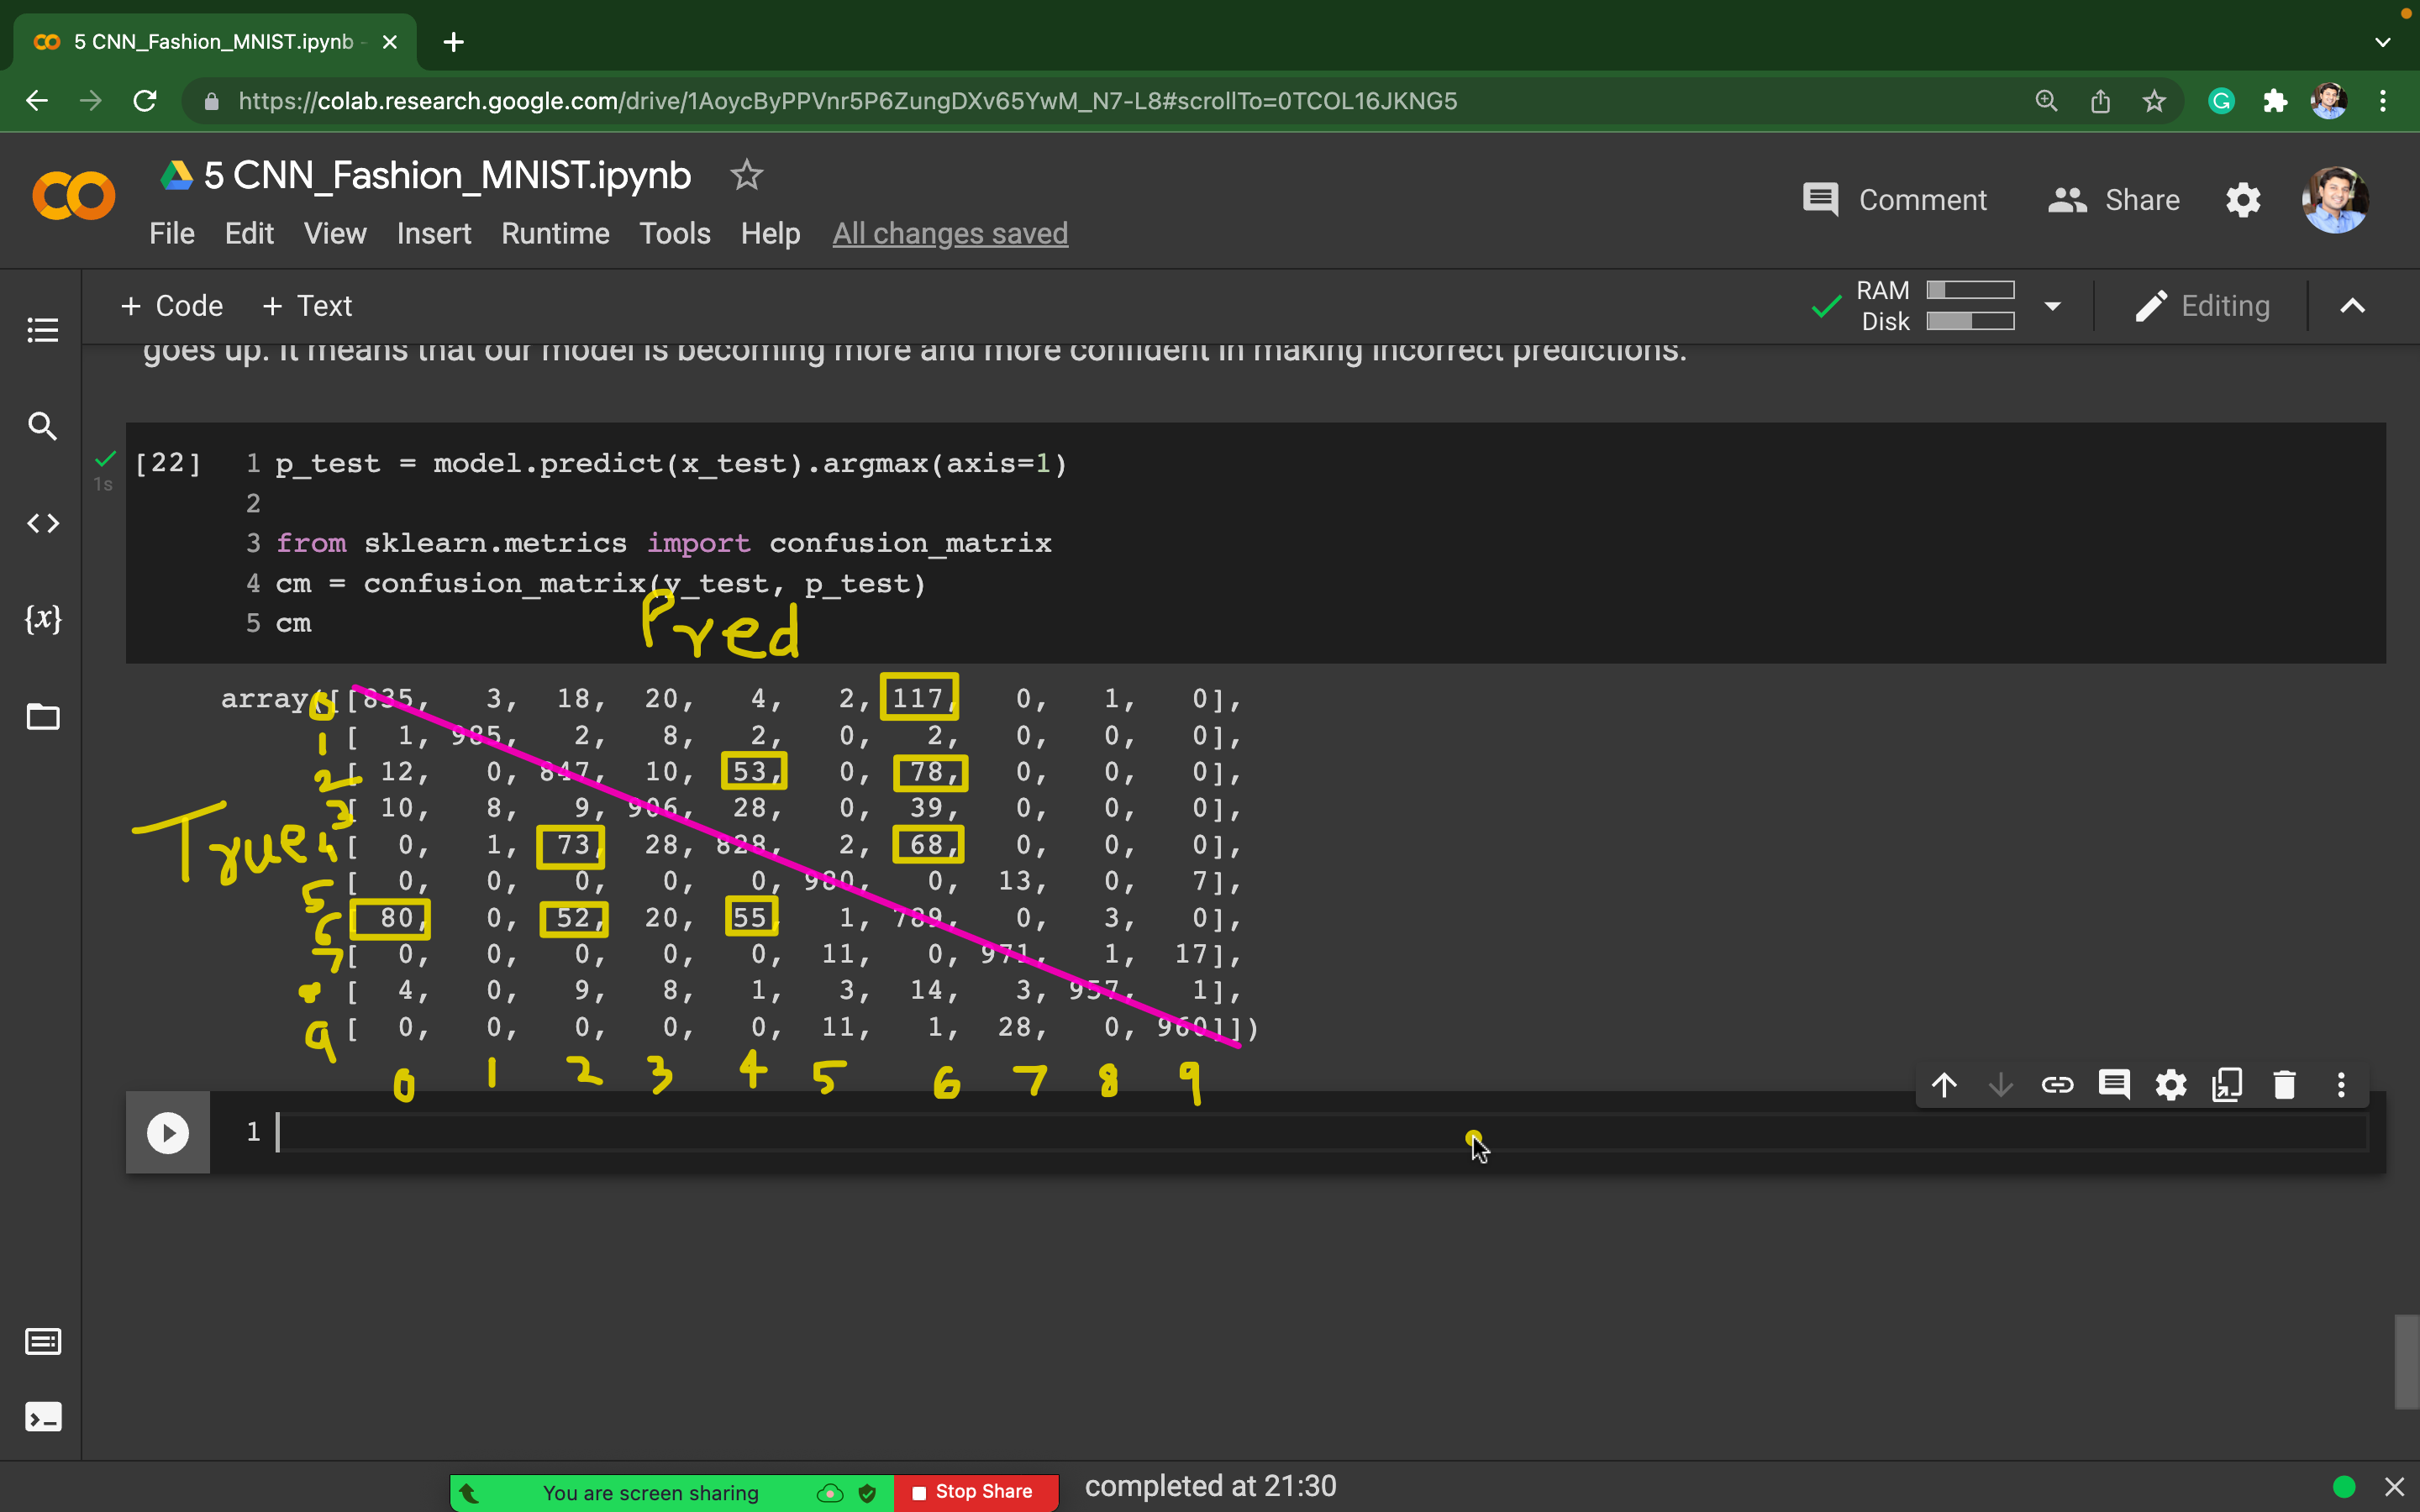

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [23]:
# Label mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [24]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

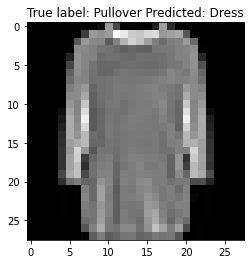

In [28]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

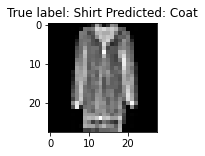

In [30]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

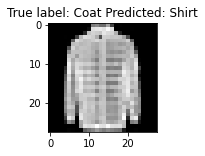

In [31]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

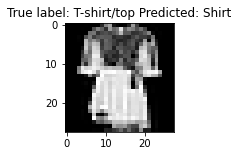

In [32]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

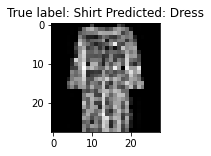

In [33]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

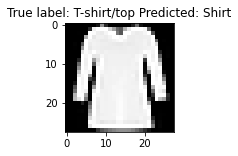

In [34]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

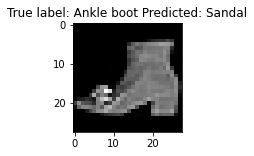

In [35]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

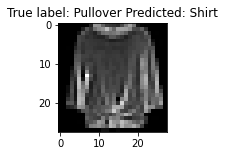

In [36]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

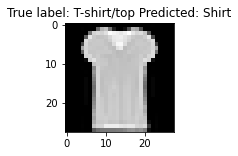

In [37]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

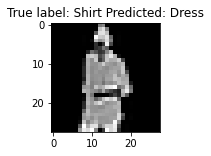

In [38]:
# Show some misclassified examples
plt.figure(figsize=(2,2))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

# Happy Learning